In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


加载和检查数据：首先，需要加载数据，并进行一些基本的检查，例如查看数据的大小、类型，是否有缺失值等。

In [2]:
import pandas as pd

# 加载数据
df = pd.read_csv('output_1145_1.csv')  # 替换为你的数据文件路径

# 检查数据
print(df.shape)  # 查看数据的行数和列数
print(df.info())  # 查看数据的类型和是否有缺失值

(905, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    905 non-null    object 
 1   prate   905 non-null    float64
 2   pr_wtr  905 non-null    float64
 3   pres    905 non-null    float64
 4   air     905 non-null    float64
 5   tmp     905 non-null    float64
dtypes: float64(5), object(1)
memory usage: 42.5+ KB
None


In [10]:
df.head()

,time,prate,pr_wtr,pres,air,tmp
0,1948/1/1,1.910000e-06,1.418707,101080.0,234.98190,252.09000
1,1948/2/1,2.180000e-06,2.181035,100300.0,237.22414,253.86000
2,1948/3/1,3.610000e-06,2.823545,100390.0,242.24744,253.00000
3,1948/4/1,9.530000e-07,2.155997,101290.0,246.99667,257.83002
4,1948/5/1,1.400000e-05,7.325806,101190.0,267.25230,266.32000


可视化数据：可视化是一种强大的工具，可以帮助我们理解数据的分布和变化趋势。

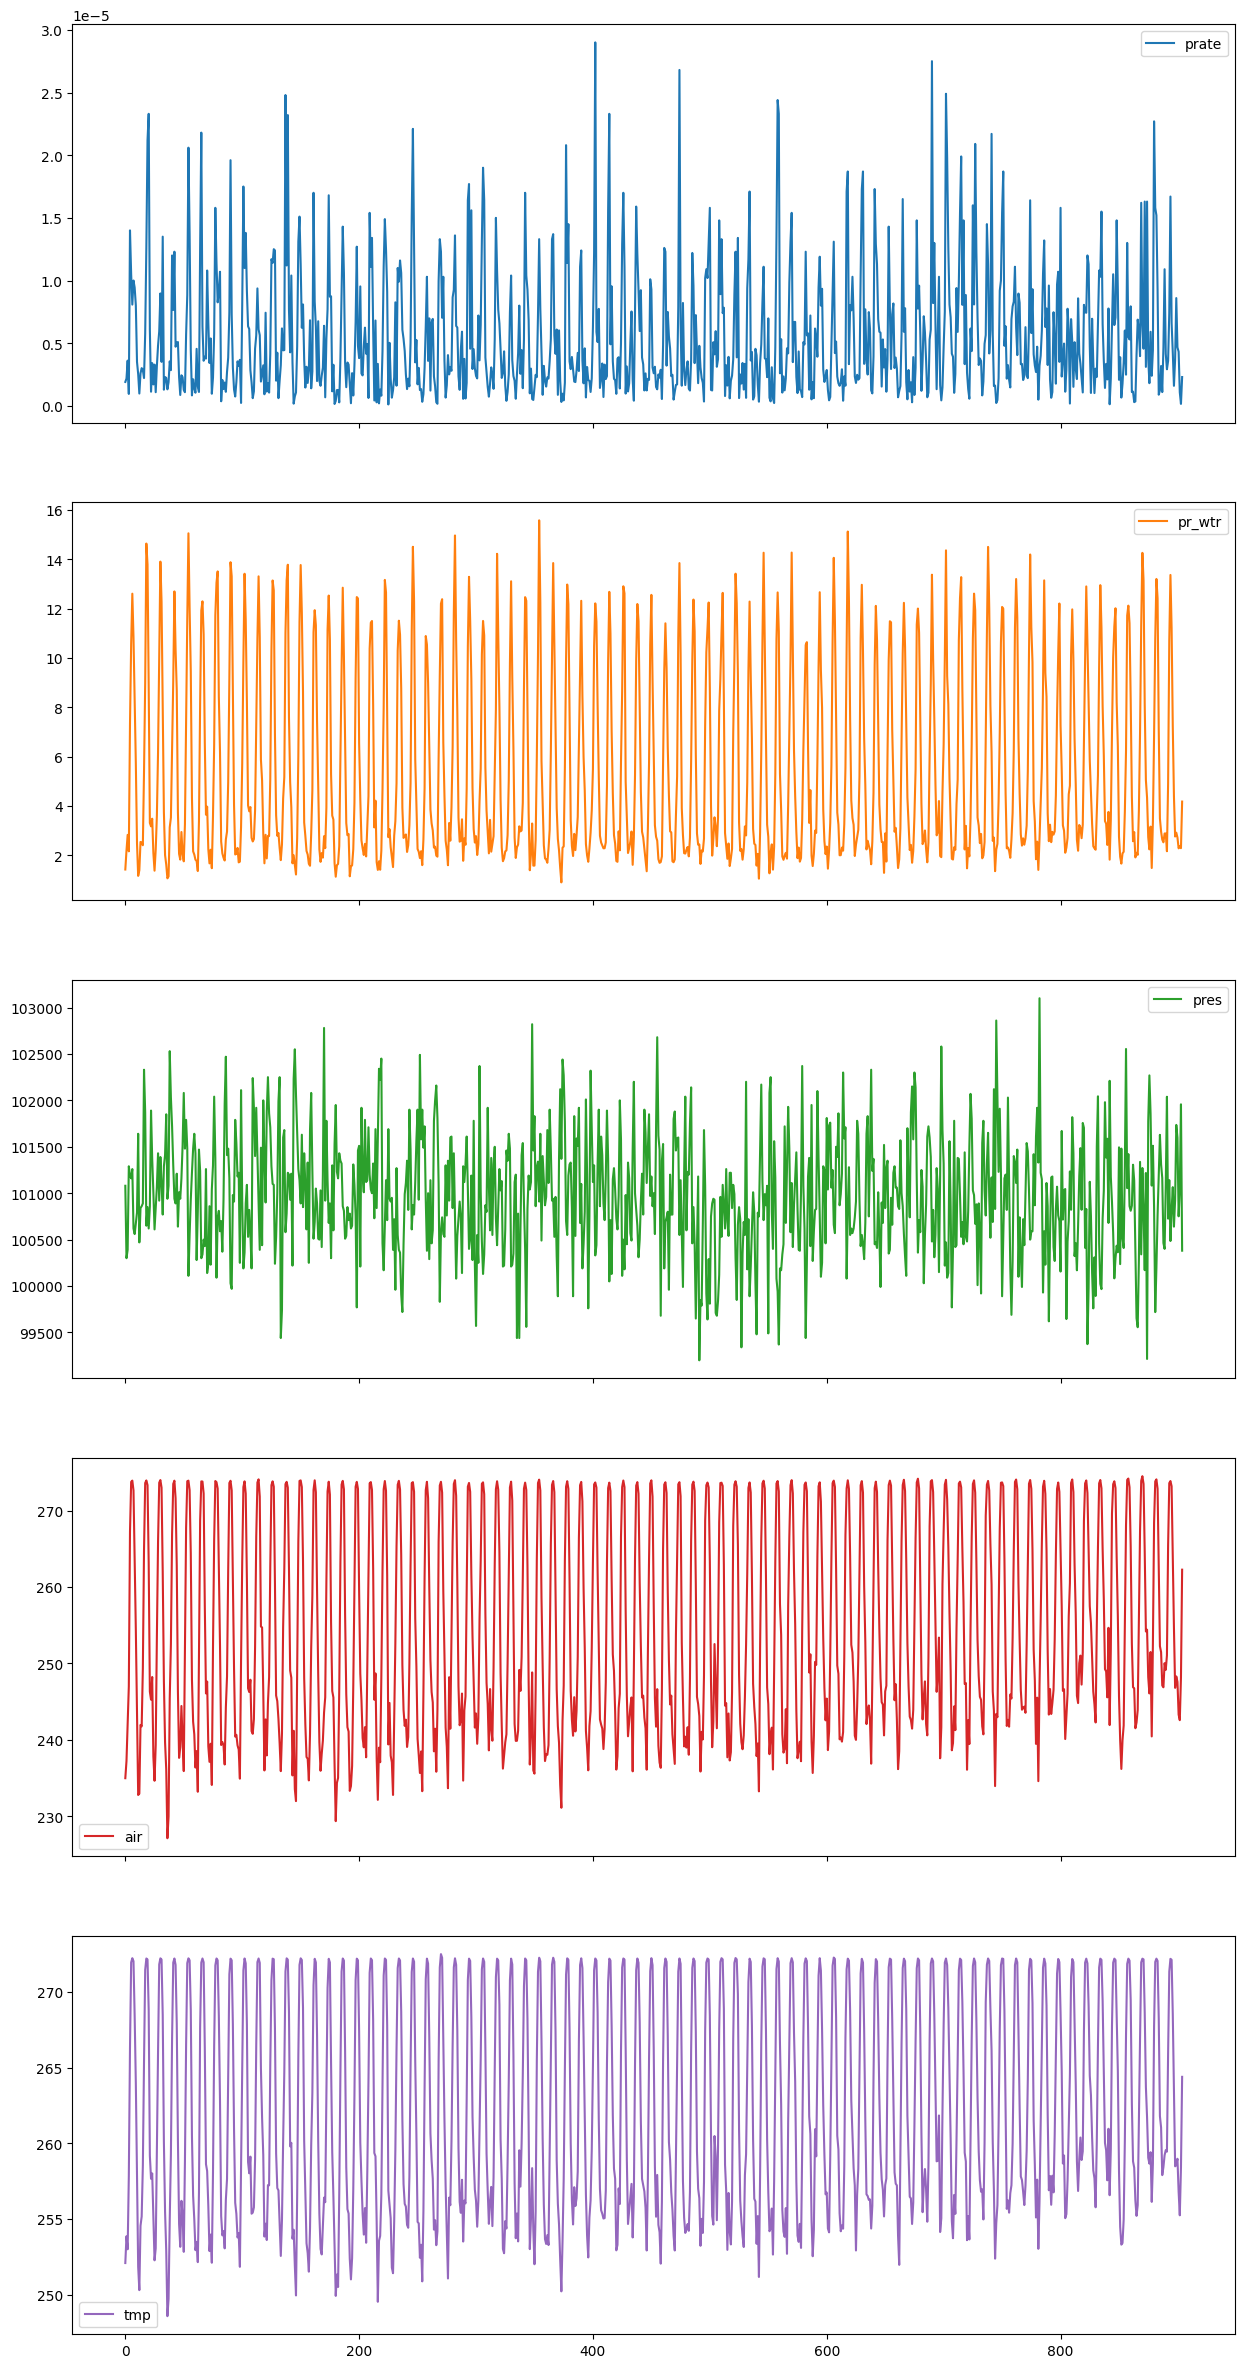

In [4]:
import matplotlib.pyplot as plt

# 绘制所有变量的时间序列图
df.plot(subplots=True, figsize=(15, 30))
plt.show()

检查数据的稳定性：在许多时间序列分析和预测模型中，数据的稳定性是一个重要的前提。你可以通过绘制滚动统计量（如滚动均值和滚动标准差）和进行ADF检验来检查数据的稳定性。


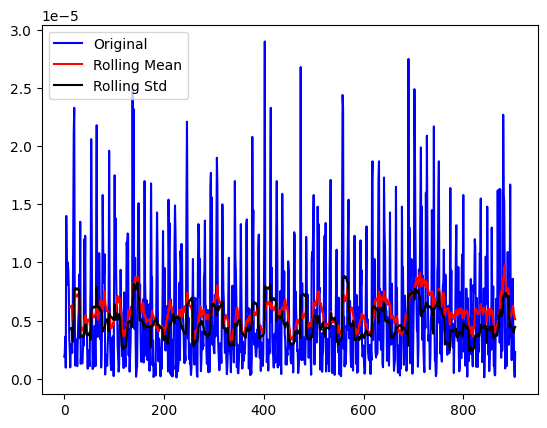

ADF Statistic: -7.789760076126845
p-value: 8.000101982313246e-12


In [5]:
from statsmodels.tsa.stattools import adfuller

# 选择一个变量进行检查，例如 'prate'
ts = df['prate']

# 绘制滚动统计量
rolling_mean = ts.rolling(window=12).mean()
rolling_std = ts.rolling(window=12).std()

plt.plot(ts, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.show()

# 进行ADF检验
result = adfuller(ts)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))

检查变量之间的相关性：你可以通过计算变量之间的相关系数和绘制热力图来查看变量之间的相关性。

<ipython-input-6-846fd95ef435>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


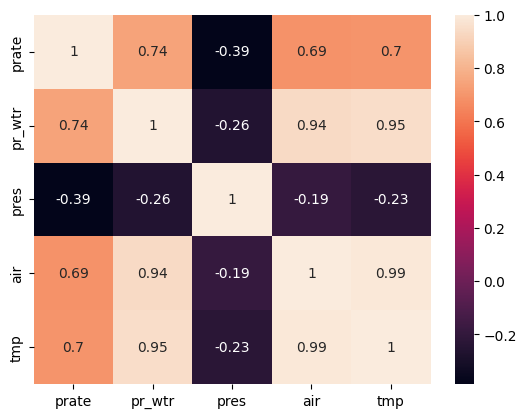

In [6]:
import seaborn as sns

# 计算相关系数
corr = df.corr()

# 绘制热力图
sns.heatmap(corr, annot=True)
plt.show()

趋势分析：趋势是时间序列数据随时间变化的长期方向。你可以通过绘制时间序列数据的线图来可视化趋势。在Python中，你可以使用Pandas的rolling函数和mean函数来计算滚动平均值，这可以帮助平滑短期波动并更好地显示趋势。

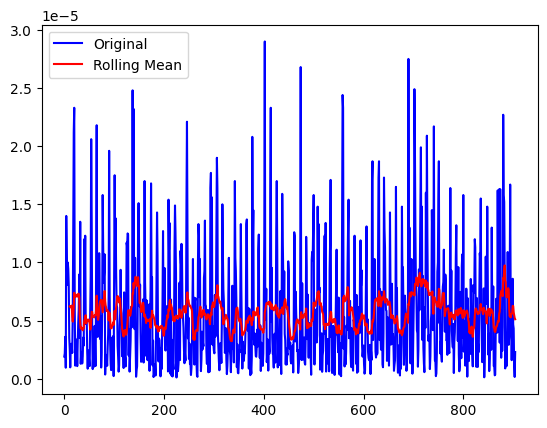

In [7]:
import matplotlib.pyplot as plt

# 选择一个变量进行检查，例如 'prate'
ts = df['prate']

# 计算滚动平均值
rolling_mean = ts.rolling(window=12).mean()

# 绘制原始数据和滚动平均值
plt.plot(ts, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.show()

季节性分析：季节性是时间序列数据在固定的时间间隔（例如，每天、每周、每月等）内重复出现的模式。你可以通过绘制数据的季节图（seasonal plot）或者使用季节性分解的方法（例如，通过statsmodels库的seasonal_decompose函数）来检查数据的季节性。

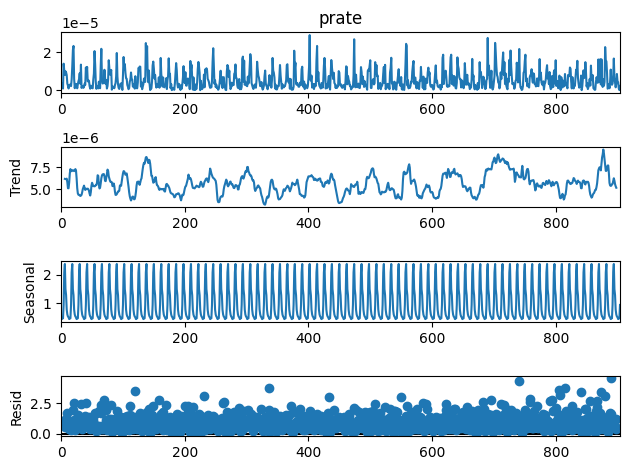

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 进行季节性分解
result = seasonal_decompose(ts, model='multiplicative', period=12)  # 假设数据的频率是每月

# 绘制分解结果
result.plot()
plt.show()